<a href="https://colab.research.google.com/github/dondreojordan/Project-Notebook-Code/blob/master/A_Look_into_Applied_Machine_Learning_w_EDA_Hotels_Data_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Back to the Basics: Pandas Datetime ML Modeling Project w/ EDA Hotels Data Modeling Project.

Blog link: https://medium.com/@dondreojordan/a-look-into-applied-machine-learning-3669b06f45bb?sk=cfd9bcbb7afb0b0e4992ab8999127971

#**About this Dataset**

**Context**
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

**Content**
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

***All personally identifying information has been removed from the data.***

**Acknowledgements**
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

**Applied Machine Learning Roadmap:**

1. Frame the Problem

2. Import Data

3. Explore the Data to Gain Insights

4. Feature Engineer/Feature Selection

5. Build Model(s)

6. Fine-Tune Model(s)

7. Report Findings


back-up data set: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv

**if all else fails in the galaxy...**


>>*“Numbers have an important story to tell. They rely on you to give them a voice.” — Stephen Few*

**Column Descriptions**
1.   Hotel (H1 = Resort Hotel or H2 = City Hotel).

2.   is_canceled
Value indicating if the booking was canceled (1) or not (0).

3.   lead_time 
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4.   arrival_date_year
Year of arrival date.

5.   arrival_date_month
Month of arrival date.

6.   arrival_date_week_number
Week number of year for arrival date.

7.   arrival_date_day_of_month
Day of arrival date.

8.   stays_in_weekend_nights
Number of weekend nights (Saturday or Sunday) the guest stayed or booked.

9.   stays_in_week_nights
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

10.  adults
Number of adults.

11.  children
Number of children.

12.  babies
Number of babies.

13.  meal
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal.

14.   country
Country of origin. Categories are represented in the ISO 3155–3:2013 format.

15.   market_segment
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

16.   distribution_channel
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

17.   is_repeated_guest
Value indicating if the booking name was from a repeated guest (1) or not (0).

18.   previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking.

19.   previous_bookings_not_canceled
Number of previous bookings not cancelled by the customer prior to the current booking.

20.   reserved_room_type
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21.   assigned_room_type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due.

22.   booking_changes
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS.

23.   deposit_type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: _____________________Fill.

24.   agent
ID of the travel agency that made the booking.

25.   company
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for.

26.   days_in_waiting_list
Number of days the booking was in the waiting list before it was confirmed to the customer.

27.   customer_type
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of

28.   adr
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

29.   required_car_parking_spaces
Number of car parking spaces required by the customer.

30.   total_of_special_requests
Number of special requests made by the customer (e.g. twin bed or high floor).

31.   reservation_status
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out.

32. reservation_status_date
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to _______________________fill


<img src="https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295">

#Frame the Problem and Look at the Big Picture

#Import Data

In [1]:
#Install Packages
import warnings
warnings.simplefilter('ignore')

!pip install category_encoders==2.*
!pip install chart_studio
!pip install pdpbox
!pip install shap

In [15]:
# Dropbox

!wget https://www.dropbox.com/s/hfdbukd3se01934/hotel_bookings.csv?dl=0

--2020-07-31 16:57:16--  https://www.dropbox.com/s/hfdbukd3se01934/hotel_bookings.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hfdbukd3se01934/hotel_bookings.csv [following]
--2020-07-31 16:57:16--  https://www.dropbox.com/s/raw/hfdbukd3se01934/hotel_bookings.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce016d6db690131a65796fbf4d0.dl.dropboxusercontent.com/cd/0/inline/A8kWZwyJE0pmuNnBFlr84w1rvYZ8__o5lxOWlt46-Y49htRrRBazaIznZlMvcHub3s6Nzfdo2sJvYnend8r2YBtEc5WG3mIOs2pCUb8FCAHW5FRre_7W8scz8jYZoaIidq0/file# [following]
--2020-07-31 16:57:17--  https://uce016d6db690131a65796fbf4d0.dl.dropboxusercontent.com/cd/0/inline/A8kWZwyJE0pmuNnBFlr84w1rvYZ8__o5lxOWlt46-Y49htRrRBazaIznZlMvcHub3s6Nzfdo2sJvYnend8r2YBtE

In [16]:
#Import Classes
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sb
import numpy as np
import pandas as pd

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px


from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score



from category_encoders import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

In [17]:
#Import Data
pd.options.display.max_columns = None
dataset = pd.read_csv('/content/hotel_bookings.csv?dl=0')
hotels = dataset.copy()

In [18]:
print("Dataset Shape", dataset.shape)
dataset

Dataset Shape (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [19]:
print("Hotel Data Set Shape:",hotels.shape)
hotels

Hotel Data Set Shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Each row (119,390 rows) represents a guest within each the Resort Hotel or the City Hotel. There are 32 attributes: 
```
'hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number',
'arrival_date_day_of_month', 'stays_in_weekend_nights',
'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
'country', 'market_segment', 'distribution_channel',
'is_repeated_guest', 'previous_cancellations',
'previous_bookings_not_canceled', 'reserved_room_type',
'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
'reservation_status', 'reservation_status_date'
```


#Explore the data to gain insights

In [20]:
#.info() method is useful to get a quick description of the data.
#Example: total numbers of rows, each attributes's type, and number of non null values.
hotels.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
# % of cells with missing values in dataframe
total_cells = np.product(hotels.shape)
total_missing_values = hotels.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 3.4%


In [22]:
# A total percent of null values present in column.
# Asks question: Of what percent are missing values in each column?
null_percentage = hotels.isnull().sum() / len(hotels) * 100
null_percentage.sort_values(ascending=False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
is_canceled                        0.000000
market_segment                     0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
babies                             0.000000
meal                               0.000000
reservation_status_date            0.000000
distribution_channel               0.000000
reservation_status                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type              

In [23]:
# All Null Values in dataset in order of amount present. 
# Four columns that will need to be addressed. 
hotels.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [24]:
hotels_num = hotels.describe().columns
hotels_cat = hotels.describe(exclude='number').columns
hotels.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


There are 119,390 instances in the dataset with the following numeric features:
```
       'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', adr', adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'
```
...and the following non-numeric features:
```
       'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'
```

In [25]:
hotels_num

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

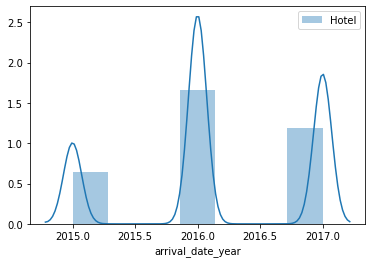

In [26]:
# Year of arrival date
sb.distplot(hotels['arrival_date_year'],bins=7,hist=True,norm_hist=True,vertical=False,label='Hotel')
plt.legend();

ValueError: ignored

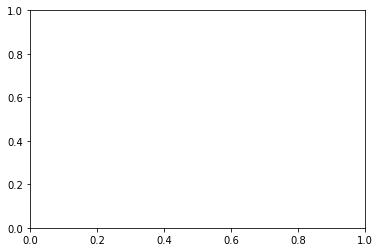

In [27]:
# Month of arrival date
sb.distplot(hotels['arrival_date_month'],bins=25,hist=True,norm_hist=True,vertical=False,label='Hotel')
plt.legend();

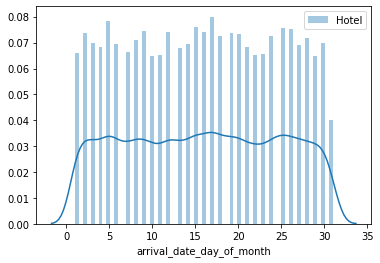

In [28]:
# Day of the month arrival date
sb.distplot(hotels['arrival_date_day_of_month'],bins=65,hist=True,norm_hist=True,vertical=False,label='Hotel')
plt.legend();

#Feature Engineering

Let's, take some time to convert the column to datetime format.

Replaced month name for numeric equivalent: [ 7  8  9 10 11 12  1  2  3  4  5  6]

Earliest date in data set: 2015-07-01 00:00:00

Latest in data set: 2017-08-31 00:00:00

The seasons are distributed throughout 792 days.

Total Guest dtype:  int64

Train Columns: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'price_per_person',
       'parking_space', 'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'arrival_date', 'day_of_year',
       'tot

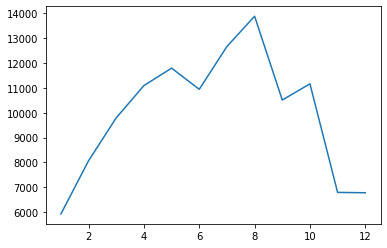

In [29]:
import datetime 

# convert the months (str) into numeric format (int) in order to convert into date time format (year, month and date)
hotels.replace({'January': 1,
                'February':2,
                'March':3,
                'April':4,
                'May':5,
                'June':6,
                'July':7,
                'August':8,
                'September':9,
                'October':10,
                'November':11,
                'December':12
}, inplace=True)
print('Replaced month name for numeric equivalent:', hotels['arrival_date_month'].unique())

#Create column 'arrival_date' from arrival features
hotels['arrival_date'] = hotels.apply(lambda x: datetime.date(x['arrival_date_year'], x['arrival_date_month'], x['arrival_date_day_of_month']), axis=1)
hotels['arrival_date'] = pd.to_datetime(hotels['arrival_date'] , infer_datetime_format=True)

#Created the numeric day of the year.
hotels['day_of_year'] = hotels.arrival_date.dt.dayofyear 

# Earliest & Latest date in data set
print('\nEarliest date in data set:', hotels.arrival_date.min())
print('\nLatest in data set:', hotels.arrival_date.max())

#Total days between the earliest row and the latest row. Timedelta().days.
total_span = (hotels.arrival_date.max() - hotels.arrival_date.min()).days 
print(f'\nThe seasons are distributed throughout {total_span} days.')

#Create Columns
hotels['total_nights_stay'] = hotels['stays_in_week_nights'] + hotels['stays_in_weekend_nights']
hotels['total_guests'] = hotels['adults'] + hotels['children'] + hotels['babies']
hotels['total_guests'].replace({np.NaN:0}, inplace=True)
total_guests = hotels['total_guests'].astype(int)
print('\nTotal Guest dtype: ', total_guests.dtypes)

#Rename column names
hotels.rename(columns = {'adr': 'price_per_person'}, inplace = True)
hotels.rename(columns = {'required_car_parking_spaces': 'parking_space'}, inplace = True)
print('\nTrain Columns:', hotels.columns)

#Create Function for Four Seasons
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
        return 'Spring'
    if x in summer:
        return 'Summer'
    if x in fall:
        return 'Fall'
    else :
        return 'Winter'

hotels['Season'] = pd.DataFrame({'arrival_date' :pd.date_range(start=pd.datetime(2017,1,1), end=pd.datetime(2017,8,31), freq='D')})    

hotels['Season'] = hotels['arrival_date'].dt.dayofyear.apply(lambda x : season(x))
print('\nSeason Column Unique Values', hotels['Season'].unique())

# Create column for each season
hotels['is_winter'] = hotels['Season'] == 'Winter'
print("Majority Class for Winter: \n", hotels['is_winter'].value_counts(normalize=True))

hotels['is_spring'] = hotels['Season'] == 'Spring'
print("\nMajority Class for Spring: \n", hotels['is_spring'].value_counts(normalize=True))

hotels['is_fall'] = hotels['Season'] == 'Fall'
print("\nMajority Class for Fall: \n", hotels['is_fall'].value_counts(normalize=True))

hotels['is_summer'] = hotels['Season'] == 'Summer'
print("\nMajority Class for Summer: \n", hotels['is_summer'].value_counts(normalize=True))

# Guest Occupancy Over Twelve (12) Month Span for both hotels
print('Arrival dates categorized by months:')
hotels['month'] = hotels.arrival_date.dt.month
guests_by_month = hotels.month.value_counts().sort_index()
print(guests_by_month)
print()
print('\n      Guest Occupancy Over Twelve (12) Month Span:')
print('\n               City and Resort Hotels')
hotels.month.value_counts().sort_index().plot(); 
plt.show();
#YAAYYYYYY, you can now see the numbers of given in any given month of the data set.




In [30]:
list(hotels.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'price_per_person',
 'parking_space',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'arrival_date',
 'day_of_year',
 'total_nights_stay',
 'total_guests',
 'Season',
 'is_winter',
 'is_spring',
 'is_fall',
 'is_summer',
 'month']

In [31]:
#Attribute Combinations
corr_matrix = hotels.corr()
corr_matrix['price_per_person'].sort_values(ascending=False)
# Swap column  ^^^^^^^^^ 

price_per_person                  1.000000
total_guests                      0.368214
children                          0.324854
is_summer                         0.319778
adults                            0.230641
arrival_date_year                 0.197580
total_of_special_requests         0.172185
company                           0.086376
day_of_year                       0.080459
month                             0.079315
arrival_date_month                0.079315
arrival_date_week_number          0.075791
total_nights_stay                 0.067945
stays_in_week_nights              0.065237
parking_space                     0.056628
stays_in_weekend_nights           0.049342
is_canceled                       0.047557
is_spring                         0.047368
arrival_date_day_of_month         0.030245
babies                            0.029186
booking_changes                   0.019618
agent                            -0.024695
days_in_waiting_list             -0.040756
lead_time  

#Target

Start with Clean Training Set
(y)

In [32]:
y = hotels['Season'].copy()
y.shape

(119390,)

Which column in your tabular dataset will you predict?

In [33]:
print('Target Values: ', y.unique())

Target Values:  ['Summer' 'Fall' 'Winter' 'Spring']


In [34]:
# What is your target?
target = 'Season'
# y = hotels['Season'].copy()

Majority Class Baseline

In [35]:
# What is the majority class? Is the class balanced/imbalanced?

print(hotels['Season'].value_counts(normalize=True))
print()
print("Majority Accuracy: 'Summer'")
print("See below for a balanced visualization:")

Summer    0.309205
Spring    0.285024
Fall      0.214825
Winter    0.190946
Name: Season, dtype: float64

Majority Accuracy: 'Summer'
See below for a balanced visualization:


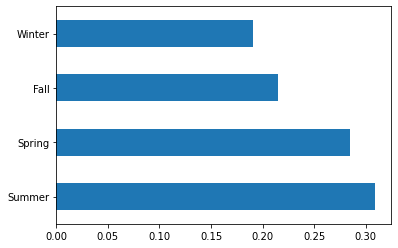

In [36]:
hotels['Season'].value_counts(normalize=True).plot(kind='barh')
plt.show();

#Choose Evaluation Metrics
```
Options: Confusion Matrix, Accuracy, Precision (Specificity), Recall (Sensitivity), F1 Score, Log-Loss, and ROC-AUC.

More information: https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

https://scikit-learn.org/stable/modules/model_evaluation.html
```


#Feature Selection


In [37]:
# Which columns need to be removed to prevent data leakage?
# Are there any other features that off-the-bat will not be used?

In [38]:
features = ['hotel', 'is_canceled', 'lead_time', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type',
       'total_of_special_requests', 'total_nights_stay', 'total_guests']
y = hotels['Season']
X = hotels[features]
y.shape, X.shape

((119390,), (119390, 19))

#Build Model(s)

##Train/Validate/Test Split: Random 80/20% train/val/test split

In [39]:
# make train and val:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=42)


print("Training Set Shape: ", X_train.shape, 
      "\nValidate Set Shape: ", X_val.shape)

Training Set Shape:  (89542, 19) 
Validate Set Shape:  (29848, 19)


In [40]:
# make test set from train:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state=42)
X_train.shape, X_test.shape

((67156, 19), (22386, 19))

In [41]:
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X validation shape:", X_val.shape)
print("y validation shape:", y_val.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (67156, 19)
y train shape: (67156,)
X validation shape: (29848, 19)
y validation shape: (29848,)
X test shape: (22386, 19)
y test shape: (22386,)


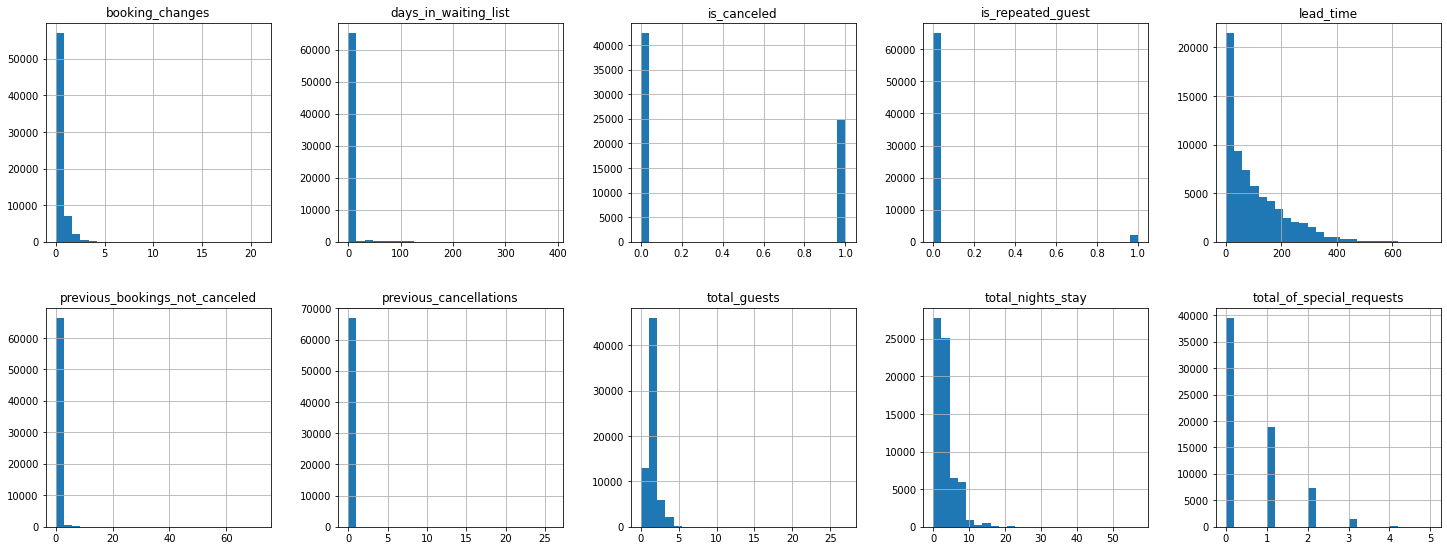

In [42]:
X_train.hist(layout=(5,5),bins=25,figsize=(25,25),sharex=False,sharey=False,grid=True)
plt.show();

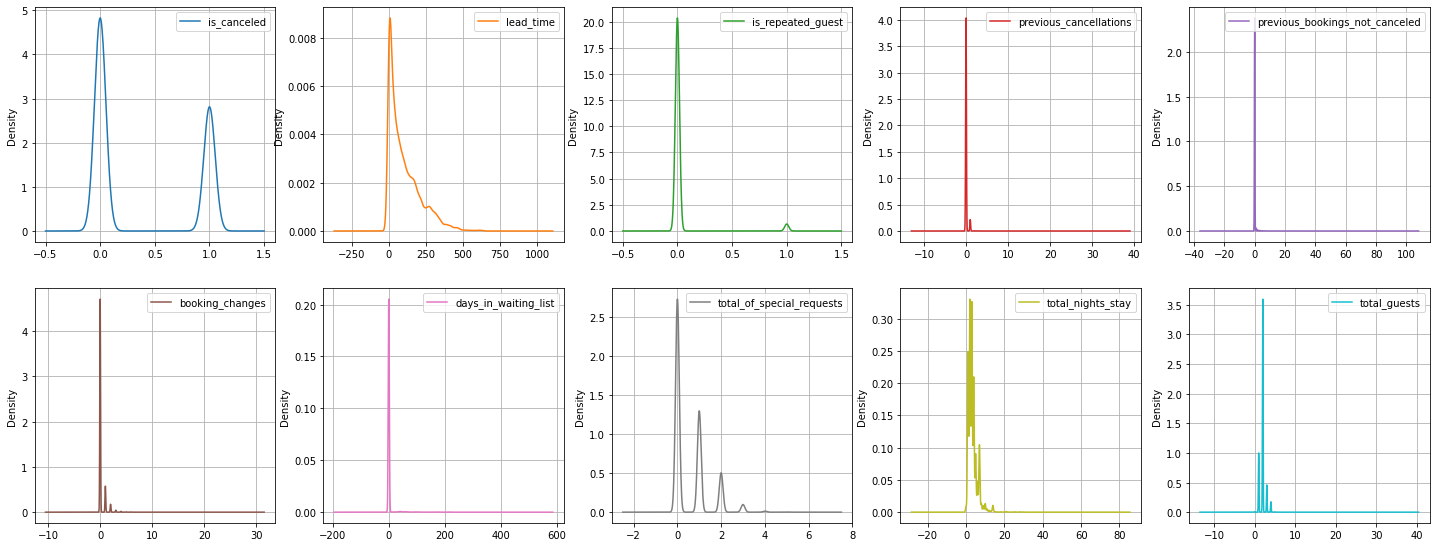

In [43]:
X_train.plot(kind='density',subplots=True,layout=(5,5),figsize=(25,25),grid=True,use_index=False,sharex=False,sharey=False);

In [44]:
######################################## Baseline Accuracy Score

In [45]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

### Training accuracy of majority class baseline = 
### frequency of majority class
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

### Validation accuracy of majority class baseline = 
### usually similar to Train accuracy

y_pred = [majority_class] * len(y_val)
print('Baseline Accuracy Score: ', accuracy_score(y_val, y_pred))

Baseline Accuracy Score:  0.31144465290806755


##Use a scikit-learn pipeline to encode categorical features and fit a Logistic Regression and Decision Tree/and Random Forest model.

Logistic Regression

In [46]:
%%time
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder

log_model = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('impute', SimpleImputer()),
                  ('classifier', LogisticRegression())
                  ])

log_model.fit(X_train, y_train)

CPU times: user 17.2 s, sys: 4.16 s, total: 21.4 s
Wall time: 12.1 s


In [47]:
# Metrics
print('Training Accuracy', log_model.score(X_train, y_train))
print('Validation Accuracy', log_model.score(X_val, y_val))

Training Accuracy 0.3844183691702901
Validation Accuracy 0.38089654248190835


Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

pipe_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=False),
    SimpleImputer(),
    DecisionTreeClassifier()
)

pipe_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['hotel', 'meal', 'country',
                                     'market_segment', 'distribution_channel',
                                     'reserved_room_type', 'assigned_room_type',
                                     'deposit_type', 'customer_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(a...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impuri

In [49]:
# Metrics
print('Training Accuracy', pipe_model.score(X_train, y_train))
print('Validation Accuracy', pipe_model.score(X_val, y_val))

Training Accuracy 0.9783340282327715
Validation Accuracy 0.599671669793621


Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

oic_model = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('impute', SimpleImputer()),
                  ('classifier', RandomForestClassifier())
                  ])

oic_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['hotel', 'meal', 'country',
                                     'market_segment', 'distribution_channel',
                                     'reserved_room_type', 'assigned_room_type',
                                     'deposit_type', 'customer_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('impute',
                 SimpleImputer(add_indicator=Fals...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease

In [51]:
# Metrics
print('Training Accuracy', oic_model.score(X_train, y_train))
print('Validation Accuracy', oic_model.score(X_val, y_val))

Training Accuracy 0.9783340282327715
Validation Accuracy 0.6354529616724739


#Metric Evaluation
(Get and format usable codes for classification metric evaluations THEN go back and interpret heavily)

The 5 Classification Evaluation metrics every Data Scientist must know: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

###Feature Importance
*3 types of Feature Importance*

In [52]:
# # Get feature importances
# rf = oic_model.named_steps['classifier']
# importances = pd.Series(rf.feature_importances_, X_train_col)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 10
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='black');

############################################################################


In [53]:
# Feature Importance by individual column (longer process)
column  = 'lead_time'



# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without lead_time: 0.5118935942106674
Validation Accuracy with lead_time: 0.6404114178504422
Drop-Column Importance for lead_time: 0.12851782363977482


### Permutation Importance (Only applicable to Validation Sets)

In [54]:
# Do-It-Yourself way, for intuition
X_val_shuffled = X_val.copy()

feature = 'lead_time'
X_val_shuffled[feature].head()

30946     203
40207      82
103708     25
85144       1
109991     70
Name: lead_time, dtype: int64

In [55]:
X_val_shuffled[feature] = np.random.permutation(X_val[feature])
X_val_shuffled[feature].head()

30946       0
40207      63
103708     10
85144     102
109991     73
Name: lead_time, dtype: int64

In [56]:
score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_shuffled, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with lead_time: 0.6404114178504422
Validation Accuracy with lead_time permuted: 0.37660814794961134
Permutation Importance: 0.26380326990083086


In [57]:
from sklearn.inspection import permutation_importance
result = permutation_importance(pipeline, X_val, y_val, 
                                n_repeats=5, random_state=0)

In [58]:
perm_importance_df = pd.DataFrame({'feature': X_val.columns,
                   'importances_mean': np.round(result['importances_mean'], 3),
                   'importances_std': result['importances_std']})

In [59]:
perm_importance_df.sort_values(by='importances_mean', ascending=False)

,feature,importances_mean,importances_std
2,lead_time,0.261,0.003672
5,market_segment,0.103,0.000962
17,total_nights_stay,0.102,0.001379
0,hotel,0.062,0.001234
4,country,0.057,0.001874
13,deposit_type,0.046,0.000816
18,total_guests,0.044,0.001685
15,customer_type,0.043,0.000757
8,previous_cancellations,0.039,0.000894
3,meal,0.039,0.001517


###Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

In [62]:
# Get labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array(['Fall', 'Spring', 'Summer', 'Winter'], dtype='<U6')

In [63]:
### 1. Check that our labels are correct
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted Fall',
  'Predicted Spring',
  'Predicted Summer',
  'Predicted Winter'],
 ['Actual Fall', 'Actual Spring', 'Actual Summer', 'Actual Winter'])

In [64]:
### 2. Make it a pandas dataframe
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted Fall,Predicted Spring,Predicted Summer,Predicted Winter
Actual Fall,3874,806,913,791
Actual Spring,577,5358,1687,856
Actual Summer,589,1392,6653,662
Actual Winter,665,943,852,3230


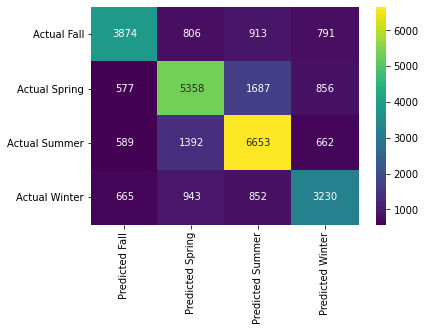

In [65]:
### 3. Plot a heatmap
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


plot_confusion_matrix(y_val, y_pred);

In [66]:
# How many correct predictions were made?
3874 +5358 + 6653 +3230

19115

In [67]:
# How many total predictions were made?
3874 + 5358 + 6653 + 3230 + 806 + 913 + 791 + 577 + 1687 + 856 + 589 + 1392 + 662 + 665 + 943 + 852

29848

In [68]:
# What was the classification accuracy?
from sklearn.metrics import accuracy_score

correct_predictions = 19115
total_predictions = 29848
correct_predictions / total_predictions

accuracy_score(y_val, y_pred)

sum(y_pred == y_val) / len(y_pred)

0.6404114178504422

In [69]:
################################### Get predicted probabilities and plot the distribution

In [70]:
### Discrete predictions look like this...
pipeline.predict(X_val)

array(['Winter', 'Summer', 'Winter', ..., 'Spring', 'Winter', 'Winter'],
      dtype=object)

In [71]:
### Predicted probabilities look like this...
pipeline.predict_proba(X_val)

array([[0.12      , 0.24      , 0.29      , 0.35      ],
       [0.04      , 0.26333333, 0.46666667, 0.23      ],
       [0.15      , 0.19      , 0.23      , 0.43      ],
       ...,
       [0.04      , 0.65      , 0.23      , 0.08      ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.27      , 0.1425    , 0.1       , 0.4875    ]])

In [72]:
### Predicted probabilities *for the positive class* ...
pipeline.predict_proba(X_val)[:, 1]

array([0.24      , 0.26333333, 0.19      , ..., 0.65      , 0.        ,
       0.1425    ])

In [73]:
### Make predicted probabilities into discrete predictions, using a "threshold"
pipeline.predict_proba(X_val)[:, 1] > 0.5

array([False, False, False, ...,  True, False, False])

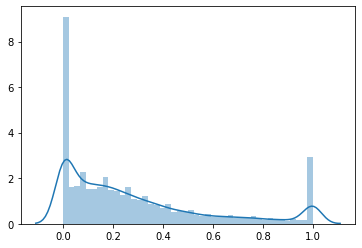

In [74]:
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
sns.distplot(y_pred_proba);

False    27592
True      2256
dtype: int64

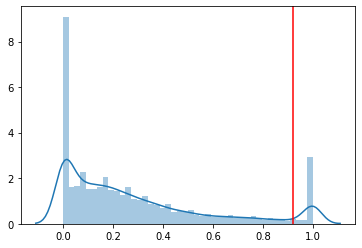

In [75]:
# Change the threshold
threshold = 0.92

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [76]:
# Identify the 2,000 reservations in the validation set with highest predicted probabilities.
results = pd.DataFrame({'y_val': y_val, 'y_pred_proba': y_pred_proba})
results

,y_val,y_pred_proba
30946,Fall,0.240000
40207,Summer,0.263333
103708,Winter,0.190000
85144,Winter,0.360000
109991,Spring,0.950000
...,...,...
49171,Spring,1.000000
98949,Fall,0.180000
86777,Spring,0.650000
64606,Winter,0.000000


In [77]:
top2000 = results.sort_values(by='y_pred_proba', ascending=False)[:2000]
top2000

,y_val,y_pred_proba
70512,Spring,1.00
113762,Spring,1.00
91233,Spring,1.00
53275,Spring,1.00
81675,Spring,1.00
...,...,...
69095,Spring,0.97
111068,Spring,0.97
68983,Spring,0.97
110536,Spring,0.97


# Fine-Tune Model(s)
example: https://twitter.com/ChristophMolnar/status/1066398522608635904

###XGBoost Parameters

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=6)
)

xgb_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['hotel', 'meal', 'country',
                                      'market_segment', 'distribution_channel',
                                      'reserved_room_type',
                                      'assigned_room_type', 'deposit_type',
                                      'customer_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'hotel',
                                          'data_type': dtype('O'),
                                          'mapping': Resort Hotel    1
City Hote...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=

In [80]:
print('Training Accuracy:', xgb_pipeline.score(X_train, y_train))
print('Validation Accuracy:', xgb_pipeline.score(X_val, y_val))

Training Accuracy: 0.47474536899160164
Validation Accuracy: 0.46622889305816134


Partial Dependence Plots with 1 feature

In [81]:
### Later, when you save matplotlib images to include in blog posts or web apps,
### increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [82]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'lead_time'

isolated = pdp_isolate(
    model=xgb_pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


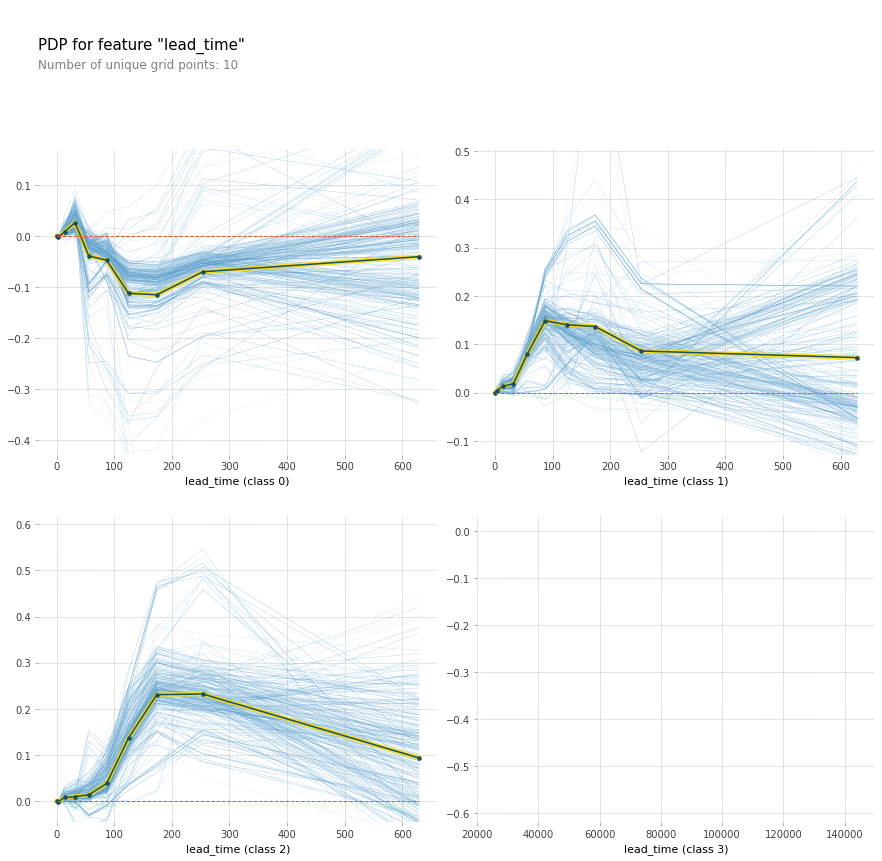

In [83]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.01)

plt.xlim(20000,150000);

#5. Conclusion

Report your findings

In [84]:
# Use score method to get accuracy of model
score = log_model.score(X_test, y_test)
print(score)

0.38153310104529614


In [85]:
# Use score method to get accuracy of model
score = xgb_pipeline.score(X_test, y_test)
print(score)

0.47659251317787904


In [86]:
# Use score method to get accuracy of model
score = pipe_model.score(X_test, y_test)
print(score)

0.5972036093987314


In [87]:
# Use score method to get accuracy of model
score = oic_model.score(X_test, y_test)
print(score)

0.633342267488609


In [ ]:
#y_pred = pipeline.predict(X_test)
#submission = sample_submission.copy()
#submission['status_group'] = y_pred

In [ ]:
#from google.colab import files
#submission.to_csv('Unit 2 Project_1.csv', index=False)
#files.download('Unit 2 Project_1.csv')